In [1]:
from pyspark.sql import SparkSession

In [2]:
sparkSession = SparkSession.builder.appName("csv").getOrCreate()

In [3]:
df_load = sparkSession.read.csv('hdfs://localhost:9000/user/Iris.csv')
df_load.show()

+---+-------------+------------+-------------+------------+-----------+
|_c0|          _c1|         _c2|          _c3|         _c4|        _c5|
+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|
|  7|          4.6|         3.4|          1.4|         0.3|Iris-setosa|
|  8|          5.0|         3.4|          1.5|         0.2|Iris-setosa|
|  9|          4.4|         2.9|          1.4|         0.2|Iris-setosa|
| 10|          4.9|         3.1|          1.5|         0.1|Iris-

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
df_pandas = df_load.toPandas()
df_pandas = df_pandas.rename(columns={'_c0': 'Id', '_c1': 'SepalLengthCm','_c2':'SepalWidthCm','_c3':'PetalLengthCm',
                                     '_c4':'PetalWidthCm','_c5':'Species'})
df_pandas = df_pandas.iloc[1:,:]
df_pandas.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa


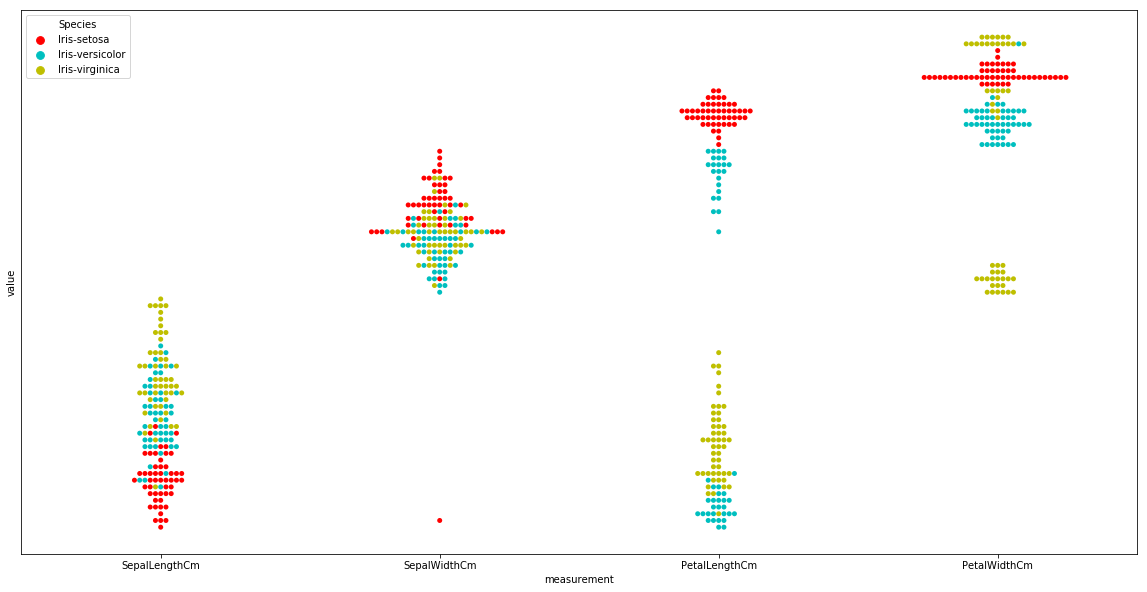

In [8]:
plt.figure(figsize=(20,10))
iris = pd.melt(df_pandas.iloc[:,1:], "Species", var_name="measurement")

sns.swarmplot(x="measurement", y="value", hue="Species",palette=["r", "c", "y"], data=iris)
plt.yticks([])
plt.show()